In [2]:
import pandas as pd
import numpy as np
import sqlite3

In [3]:
Videogames = pd.read_csv("/Users/victormorenorequena/Desktop/My_Projects/all_video_games(cleaned).csv")
Videogames

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,User Score,User Ratings Count,Platforms Info
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,['Action'],NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5..."
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,5.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas..."
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,"['Western', 'RPG']",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'..."
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,['RPG'],NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'..."
...,...,...,...,...,...,...,...,...,...,...
14050,Dragon Age: Origins - Awakening,3/16/2010,BioWare,Electronic Arts,Western RPG,"['Western', 'RPG']",Rated M For Mature,8.0,516.0,"[{'Platform': 'PlayStation 3', 'Platform Metas..."
14051,Lover Pretend,12/1/2022,Idea Factory,Aksys Games,Visual Novel,"['Visual', 'Novel']",Rated T For Teen,NaN,NaN,"[{'Platform': 'Nintendo Switch', 'Platform Met..."
14052,Alice: Madness Returns,6/14/2011,Spicy Horse,Electronic Arts,Survival,['Survival'],Rated M For Mature,8.3,276.0,"[{'Platform': 'PC', 'Platform Metascore': '75'..."
14053,Concrete Genie,10/8/2019,Pixel Opus,Sony Interactive Entertainment,Third-Person Adventure,"['Third-Person', 'Adventure']",Rated E +10 For Everyone +10,8.1,480.0,"[{'Platform': 'PlayStation 4', 'Platform Metas..."


In [4]:
Videogames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               14034 non-null  object 
 1   Release Date        13991 non-null  object 
 2   Developer           13917 non-null  object 
 3   Publisher           13917 non-null  object 
 4   Genres              14034 non-null  object 
 5   Genres Splitted     14034 non-null  object 
 6   Product Rating      11005 non-null  object 
 7   User Score          11714 non-null  float64
 8   User Ratings Count  11299 non-null  float64
 9   Platforms Info      14055 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.1+ MB


In [5]:
Videogames.describe()

,User Score,User Ratings Count
count,11714.000000,11299.000000
mean,6.894852,245.642977
std,1.392213,1847.895353
min,0.300000,5.000000
25%,6.200000,14.000000
50%,7.200000,34.000000
75%,7.900000,111.000000
max,10.000000,163419.000000


In [6]:
categorical = Videogames.dtypes[Videogames.dtypes == "object"].index
print(categorical)

Videogames[categorical].describe()

Index(['Title', 'Release Date', 'Developer', 'Publisher', 'Genres',
       'Genres Splitted', 'Product Rating', 'Platforms Info'],
      dtype='object')


,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,Platforms Info
count,14034,13991,13917,13917,14034,14034,11005,14055
unique,14034,4752,4449,2307,119,119,6,11956
top,Ziggurat (2012),11/14/2006,Capcom,Nintendo,Action Adventure,"['Action', 'Adventure']",Rated T For Teen,[]
freq,1,27,184,617,732,732,3835,29


In [7]:
Videogames["Product Rating"].unique()

array([nan, 'Rated E For Everyone', 'Rated T For Teen',
       'Rated E +10 For Everyone +10', 'Rated M For Mature',
       'Rated RP For Rate Pending', 'Rated AO For Adults Only'],
      dtype=object)

In [8]:
Transf_Rating = Videogames["Product Rating"].astype(str) #Convert data to str
Rating = np.array([rating[0] for rating in Transf_Rating]) #Take first letter
Rating = pd.Categorical(Transf_Rating)
Rating.describe()

,counts,freqs
categories,,
Rated AO For Adults Only,1,0.000071
Rated E +10 For Everyone +10,1628,0.115831
Rated E For Everyone,3435,0.244397
Rated M For Mature,2089,0.148630
Rated RP For Rate Pending,17,0.001210
Rated T For Teen,3835,0.272857
nan,3050,0.217005


array([[<Axes: title={'center': 'User Score'}>]], dtype=object)

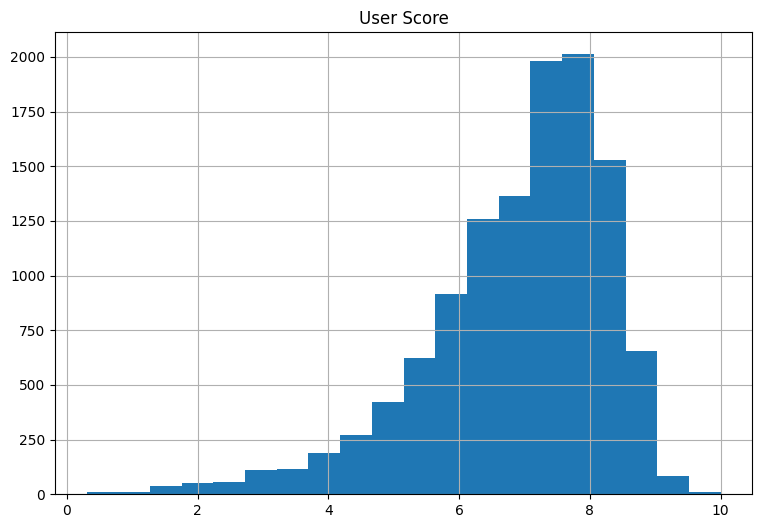

In [9]:
Videogames.hist(column="User Score", #Column to plot
                   figsize=(9,6), #Plot Size
                   bins=20) #Number of histogram plots

<Axes: >

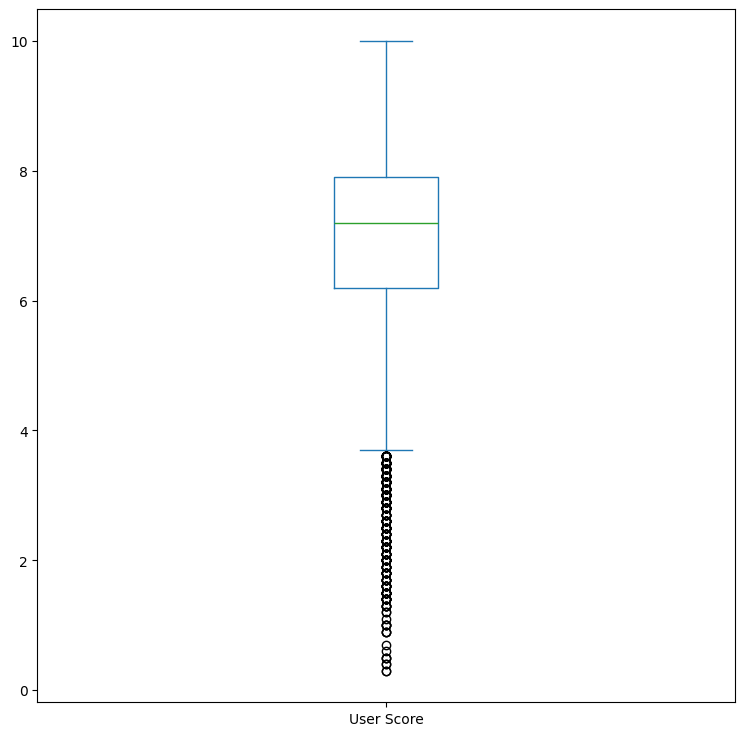

In [10]:
Videogames["User Score"].plot(kind="box",
                           figsize=(9,9))

In [11]:
Videogames.hist(column="Genres", #Column to plot
                   figsize=(9,6), #Plot Size
                   bins=20) #Number of histogram plots

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [14]:
Most_Lliked_Videogame = np.where(Videogames["User Score"] == max(Videogames["User Score"]))
Videogames.loc[Most_Lliked_Videogame]

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,User Score,User Ratings Count,Platforms Info
5216,LISA: Definitive Edition,7/18/2023,Dingaling,Serenity Forge,RPG,['RPG'],Rated M For Mature,10.0,NaN,"[{'Platform': 'PC', 'Platform Metascore': 'tbd..."


In [15]:
Least_Lliked_Videogame = np.where(Videogames["User Score"] == min(Videogames["User Score"]))
Videogames.loc[Least_Lliked_Videogame]

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,User Score,User Ratings Count,Platforms Info
4757,Gargoyles Remastered,10/19/2023,Empty Clip Studios,Disney Interactive Studios,2D Platformer,"['2D', 'Platformer']",Rated E +10 For Everyone +10,0.3,6.0,"[{'Platform': 'Nintendo Switch', 'Platform Met..."
10133,Madden NFL 21,8/25/2020,EA Sports,Electronic Arts,Football Sim,"['Football', 'Sim']",Rated E For Everyone,0.3,5808.0,"[{'Platform': 'Xbox Series X', 'Platform Metas..."


In [17]:
Videogames_2= pd.DataFrame({"Title": ("FC 24", "GTA 6"),
                       "Release Date":("10/20/2023", "10/20/2024",),
                       "Developer": ("Vic", "Santi"),
                       "Publisher": ("Santi", "Vic"),
                       "Genres": ("Sports", "Action"),
                       "Genres Splitted": ("Sports", "Action"),
                       "Product Rating": ("E", "A"),
                       "User Score": (0, 10),
                       "User Rating Counts": (10, 5),
                       "Platforms info": ("PSN, XBOX, NINTENDO","PSN, XBOX, NINTENDO")
                       })

In [18]:
Videogames_2

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,User Score,User Rating Counts,Platforms info
0,FC 24,10/20/2023,Vic,Santi,Sports,Sports,E,0,10,"PSN, XBOX, NINTENDO"
1,GTA 6,10/20/2024,Santi,Vic,Action,Action,A,10,5,"PSN, XBOX, NINTENDO"


In [24]:
combined = pd.merge(Videogames, Videogames_2, how="outer", on="Title")
combined

,Title,Release Date_x,Developer_x,Publisher_x,Genres_x,Genres Splitted_x,Product Rating_x,User Score_x,User Ratings Count,Platforms Info,Release Date_y,Developer_y,Publisher_y,Genres_y,Genres Splitted_y,Product Rating_y,User Score_y,User Rating Counts,Platforms info
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,['Action'],NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,5.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,"['Western', 'RPG']",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,['RPG'],NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14052,Alice: Madness Returns,6/14/2011,Spicy Horse,Electronic Arts,Survival,['Survival'],Rated M For Mature,8.3,276.0,"[{'Platform': 'PC', 'Platform Metascore': '75'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14053,Concrete Genie,10/8/2019,Pixel Opus,Sony Interactive Entertainment,Third-Person Adventure,"['Third-Person', 'Adventure']",Rated E +10 For Everyone +10,8.1,480.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14054,Lemony Snicket's A Series of Unfortunate Event...,11/10/2004,Griptonite Games,Activision,3D Platformer,"['3D', 'Platformer']",Rated E For Everyone,NaN,NaN,"[{'Platform': 'Game Boy Advance', 'Platform Me...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14055,FC 24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/20/2023,Vic,Santi,Sports,Sports,E,0.0,10.0,"PSN, XBOX, NINTENDO"


In [27]:
combined.rename(columns={"Release Date_x":"Release Date_y", }, inplace=True)
combined = pd.merge(Videogames,Videogames_2, how="outer",on=["Title"])
combined

,Title,Release Date_x,Developer_x,Publisher_x,Genres_x,Genres Splitted_x,Product Rating_x,User Score_x,User Ratings Count,Platforms Info,Release Date_y,Developer_y,Publisher_y,Genres_y,Genres Splitted_y,Product Rating_y,User Score_y,User Rating Counts,Platforms info
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,['Action'],NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,5.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,"['Western', 'RPG']",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,['RPG'],NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14052,Alice: Madness Returns,6/14/2011,Spicy Horse,Electronic Arts,Survival,['Survival'],Rated M For Mature,8.3,276.0,"[{'Platform': 'PC', 'Platform Metascore': '75'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14053,Concrete Genie,10/8/2019,Pixel Opus,Sony Interactive Entertainment,Third-Person Adventure,"['Third-Person', 'Adventure']",Rated E +10 For Everyone +10,8.1,480.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14054,Lemony Snicket's A Series of Unfortunate Event...,11/10/2004,Griptonite Games,Activision,3D Platformer,"['3D', 'Platformer']",Rated E For Everyone,NaN,NaN,"[{'Platform': 'Game Boy Advance', 'Platform Me...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14055,FC 24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/20/2023,Vic,Santi,Sports,Sports,E,0.0,10.0,"PSN, XBOX, NINTENDO"
